<a href="https://colab.research.google.com/github/NeefPoom/CP3-Poomi-Keaokao/blob/master/01_Working_with_data_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading files

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# read csv files from Github

url = 'https://raw.githubusercontent.com/thanachart/IntroBADS/master/Transactions.csv'
df_transactions = pd.read_csv(url)
df_transactions.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


# Cleansing data

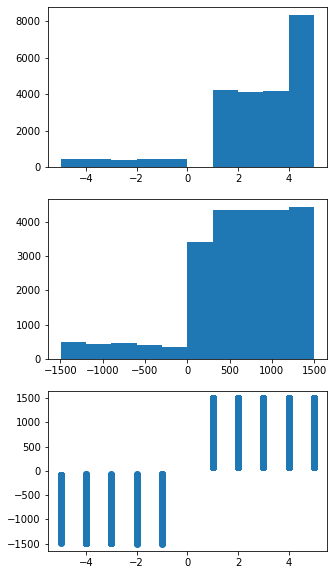

In [0]:
#display distribution of data
fig, ax = plt.subplots(3, 1, figsize=(5,10))

ax[0].hist(df_transactions['Qty'], bins=10)
ax[1].hist(df_transactions['Rate'], bins=10)
ax[2].scatter(df_transactions['Qty'], df_transactions['Rate'])

plt.show() 

#you will see that there are transactions with negative qty and rate

In [0]:
#we will separate positive and negative qty transaction into two dataframes

df_transactions_pos = df_transactions[df_transactions['Qty'] > 0]
df_transactions_neg = df_transactions[df_transactions['Qty'] < 0]

In [0]:
df_transactions_pos.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop


In [0]:
df_transactions_neg.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop


In [0]:
#let's see whether the transaction ids of negative transactions would match with the ids from the positive

df_transactions_pos[df_transactions_pos['transaction_id'].isin(df_transactions_neg['transaction_id'])]

#we can imply that these negative transactions are returns

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop
26,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop
64,58223423237,268138,2014-02-17,6,5,3,1398,440.370,4634.370,e-Shop
66,22643667930,271489,2014-02-17,12,6,1,1225,128.625,1353.625,TeleShop
72,79792372943,275108,2014-02-17,3,1,3,908,286.020,3010.020,MBR
...,...,...,...,...,...,...,...,...,...,...
23032,90114483354,268097,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR


In [0]:
#let's clean the negative out of the positive.

df_transactions_cleaned = df_transactions_pos[df_transactions_pos['transaction_id'].isin(df_transactions_neg['transaction_id'])]
df_transactions_cleaned.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop
26,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop
64,58223423237,268138,2014-02-17,6,5,3,1398,440.370,4634.370,e-Shop
66,22643667930,271489,2014-02-17,12,6,1,1225,128.625,1353.625,TeleShop
72,79792372943,275108,2014-02-17,3,1,3,908,286.020,3010.020,MBR
